# Convex Optimization
## Tutorial 11
### Tanmay Garg CS20BTECH11063

In [42]:
#Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math

In [43]:
from sp_ln_sp import *

In [44]:
a = cp.Variable((n,))
b = cp.Variable(1)


MyObjective = cp.Minimize(cp.norm(a, 2))
MyConstraits = [
    X.T@a - b >= 1,
    Y.T@a - b <= -1,
]

MyProblem = cp.Problem(MyObjective, MyConstraits)
opt_val = MyProblem.solve()
print("The Maximum thickness value is: ", 2 / opt_val)

The Maximum thickness value is:  116.42440493435046


In [45]:
# lambda_val = np.logspace(-10, 10)
# lambda_val = np.logspace(1, 8)
# lambda_val = np.logspace(0, 5)
lambda_val = np.logspace(-3, 5)
Width_A = []
card_A = []
A_val = np.zeros((n, len(lambda_val)))

for i in range(len(lambda_val)):
    a = cp.Variable((n,))
    b = cp.Variable(1)

    MyObjective = cp.Minimize(cp.norm(a, 2) + lambda_val[i] * cp.norm(a, 1))

    MyConstraits = [
        X.T@a - b >= 1,
        Y.T@a - b <= -1,
    ]

    MyProblem = cp.Problem(MyObjective, MyConstraits)
    opt_val = MyProblem.solve()
    
    Width_A.append(2 / cp.norm(a, 2).value)
    card_A.append(np.count_nonzero(np.abs(a.value) > 1e-4))
    A_val[:, i] = a.value


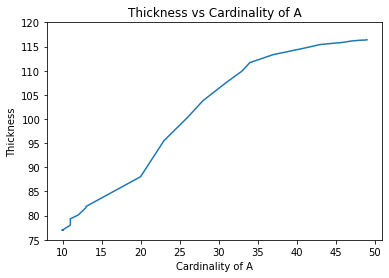

In [46]:
plt.figure()
plt.plot(card_A, Width_A)
plt.ylabel('Thickness')
plt.xlabel('Cardinality of A')
plt.title('Thickness vs Cardinality of A')
plt.xticks(np.arange(10, 55, 5.0))
plt.yticks(np.arange(75, 125, 5.0))
plt.show()
# print(card_A)
# print(np.amax(A_val))

In [47]:
mat = np.where(np.array(card_A) == 10)
# print(mat)
# print(mat[0][-1])

# chosen_width = Width_A[mat[0][-1]]
chosen_a = A_val[:, mat[0][0]]

chosen_feature = np.where(np.abs(chosen_a) > 1e-4)
num_features = len(chosen_feature[0])

new_X = X[chosen_feature[0], :]
new_Y = Y[chosen_feature[0], :]

a = cp.Variable((num_features,))
b = cp.Variable(1)
MyObjective = cp.Minimize(cp.norm(a, 2))
MyConstraits = [
    new_X.T@a - b >= 1,
    new_Y.T@a - b <= -1,
]

MyProblem = cp.Problem(MyObjective, MyConstraits)
opt_val = MyProblem.solve()
# print("The Maximum original thickness value is: ", Width_A[mat[0][0]])
print("The Maximum thickness value for 10 features is: ", 2 / opt_val)
print("Indices Chosen: ", chosen_feature[0])
# print(chosen_feature)

# print(card_A)
# print(np.amax(A_val))


The Maximum thickness value for 10 features is:  78.46967629764835
Indices Chosen:  [ 0  6  7 17 18 20 22 25 26 45]
